# Plot embedded data

In [11]:
using NPZ, Printf, NNlib, Statistics, Plots, JLD2, LinearAlgebra, Distributions

In [12]:
pwd()

"/Users/chenwei/Desktop/Github/RPE/code"

## PCA Vis

In [13]:
data_npy = npzread("data/I1_0_pca_uniq.npy")

Dict{String, Array} with 6 entries:
  "time_fract" => [0.00167645, 0.000838223, 0.00670578, 0.463118, 0.178122, 0.2…
  "time"       => [0.0, 2.0e-9, 2.0e-9, 2.0e-9, 2.0e-9, 3.0e-9, 1.3e-8, 1.3e-8,…
  "energy"     => [0.0, 2.9, 1.5, -0.4, -1.5, -0.1, 1.5, 1.8, 2.9, 1.0  …  1.8,…
  "occp"       => [0.00398804, 0.000997009, 0.000997009, 0.00498504, 0.00099700…
  "time_count" => [4.0e-9, 2.0e-9, 1.6e-8, 1.105e-6, 4.25e-7, 7.09e-7, 1.8e-8, …
  "pca"        => Float32[4.05011 -0.686522 -0.445801; -4.04157 -2.90185 4.3255…

In [14]:
size(data_npy["energy"]),size(data_npy["pca"]),size(data_npy["occp"])

((21,), (21, 3), (21,))

### Plot PCA with 2 components X,Y-axes and energy as Z-axis with color

In [6]:
X = data_npy["pca"][:,1]; Y = data_npy["pca"][:,2]; Z = data_npy["energy"];

In [7]:
X[end], Z[end],data_npy["time"][end]

(6.5928574f0, -1.7, 2.386e-6)

In [10]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.85) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.85) # Red for Sf

xlims!(floor(minimum(X)),ceil(maximum(X)))
ylims!(floor(minimum(Y)),ceil(maximum(Y)))

plot!(xlabel="X", ylabel="Y")

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_2d_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_2d_fps2.gif")
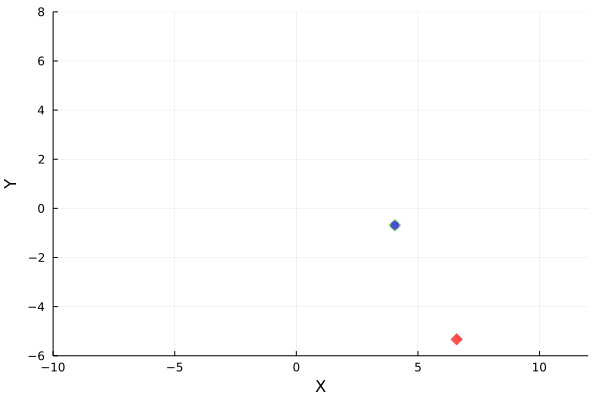

In [25]:
# 2D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,display_option=Plots.GR.OPTION_LINES,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(floor(minimum(X)),ceil(maximum(X))) 
    ylims!(floor(minimum(Y)),ceil(maximum(Y)))
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/uniq_plot/pca2_2d_fps2.gif", fps=2)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_gifland_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_gifland_fps2.gif")
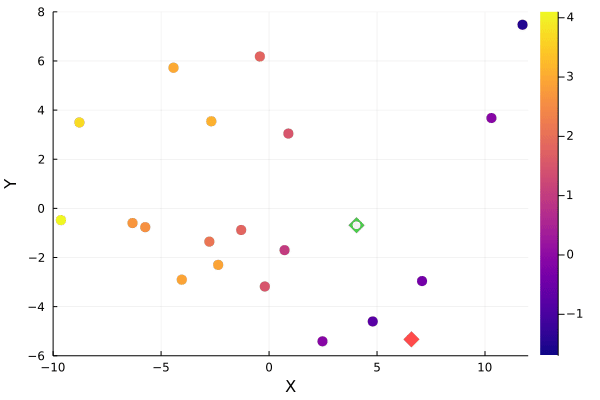

In [8]:
# 2D landscape gif
gr()
plot()

anim = @animate for i in 1:length(X)
    scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:grays)[2],
            markersize=5.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(floor(minimum(X)),ceil(maximum(X))) 
    ylims!(floor(minimum(Y)),ceil(maximum(Y)))
    plot!(xlabel="X", ylabel="Y")
    
end #every 10

gif(anim,"../plot/uniq_plot/pca2_gifland_fps2.gif", fps=2)

In [26]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=2,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf
xlims!(floor(minimum(X)),ceil(maximum(X)))
ylims!(floor(minimum(Y)),ceil(maximum(Y)))
zlims!(floor(minimum(Z)),ceil(maximum(Z)))
plot!(xlabel="X", ylabel="Y", zlabel = "Energy")



┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_zcolorG_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_zcolorG_fps2.gif")
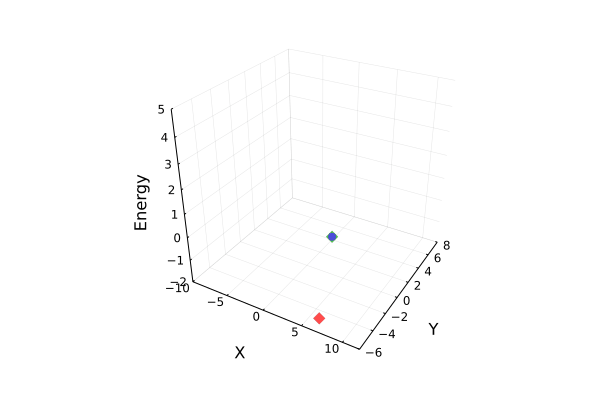

In [27]:
# 3D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],[Z[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(floor(minimum(X)),ceil(maximum(X))); ylims!(floor(minimum(Y)),ceil(maximum(Y))),
        zlims!(floor(minimum(Z)),ceil(maximum(Z)))
    plot!(xlabel="X", ylabel="Y", zlabel = "Energy")
    
end #every 100

gif(anim,"../plot/uniq_plot/pca2_zcolorG_fps2.gif", fps=2)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_3Dgifland_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


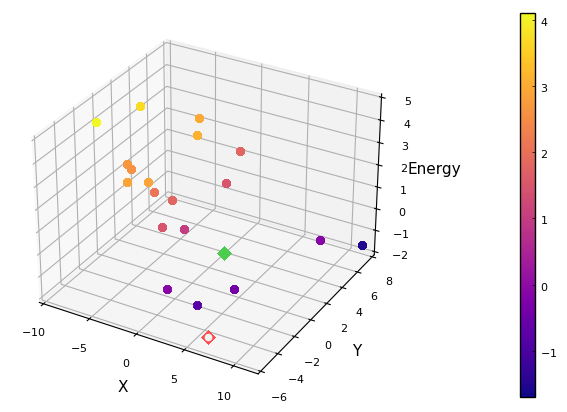

Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca2_3Dgifland_fps2.gif")
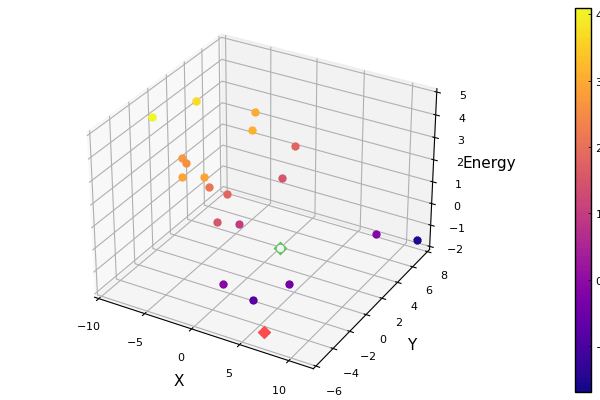

In [28]:
# 3D landscape gif
pyplot()
plot()

anim = @animate for i in 1:length(X)
    scatter!(X,Y,Z,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:grays)[2],
            markersize=5.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(floor(minimum(X)),ceil(maximum(X))); ylims!(floor(minimum(Y)),ceil(maximum(Y))),
        zlims!(floor(minimum(Z)),ceil(maximum(Z)))
    plot!(xlabel="X", ylabel="Y", zlabel = "Energy")
    
end #every 100

gif(anim,"../plot/uniq_plot/pca2_3Dgifland_fps2.gif", fps=2)

### Plot PCA with 3 components X,Y,Z-axes, and energy as color 

In [29]:
X=data_npy["pca"][:,1]; Y=data_npy["pca"][:,2]; Z=data_npy["pca"][:,3]; energy=data_npy["energy"];

In [30]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=energy,m=cgrad(:plasma),markerstrokewidth=0,markersize=2,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf

xlims!(floor(minimum(X)),ceil(maximum(X)))
ylims!(floor(minimum(Y)),ceil(maximum(Y)))
zlims!(floor(minimum(Z)),ceil(maximum(Z)))
plot!(xlabel="X", ylabel="Y", zlabel = "Z")


┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca3_zcolorG_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca3_zcolorG_fps2.gif")
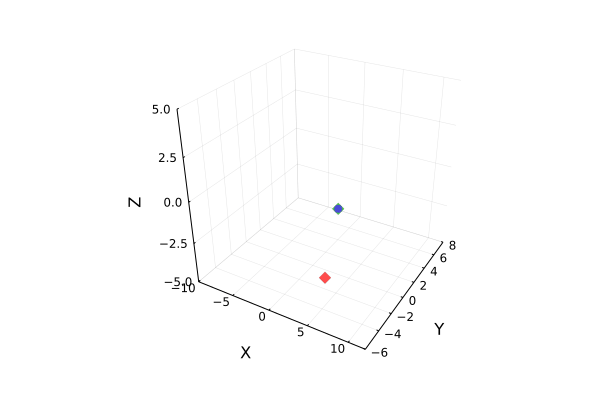

In [31]:
# 3D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,display_option=Plots.GR.OPTION_LINES,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],[Z[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(floor(minimum(X)),ceil(maximum(X))); ylims!(floor(minimum(Y)),ceil(maximum(Y))),
        zlims!(floor(minimum(Z)),ceil(maximum(Z)))
    plot!(xlabel="X", ylabel="Y", zlabel = "Z") # camera=(32,3)
    
end #every 100

gif(anim,"../plot/uniq_plot/pca3_zcolorG_fps2.gif", fps=2)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca3_3Dgifland_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


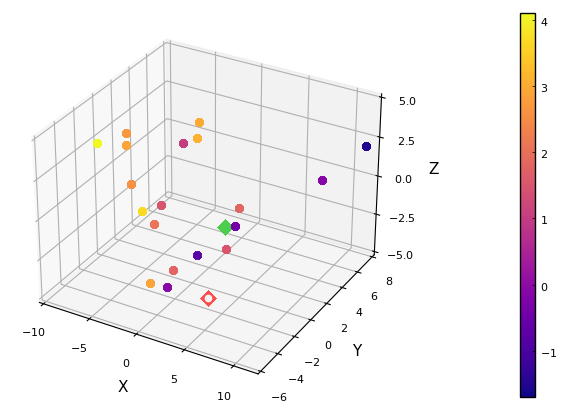

Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/pca3_3Dgifland_fps2.gif")
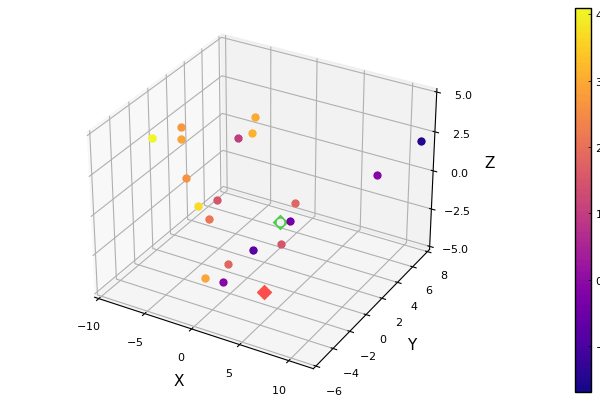

In [32]:
# 3D landscape gif
pyplot()
plot()

anim = @animate for i in 1:length(X)
    scatter!(X,Y,Z,zcolor=energy,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:grays)[2],
            markersize=5.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(floor(minimum(X)),ceil(maximum(X)))
    ylims!(floor(minimum(Y)),ceil(maximum(Y)))
    zlims!(floor(minimum(Z)),ceil(maximum(Z)))
    plot!(xlabel="X", ylabel="Y", zlabel = "Z")
    
end #every 100

gif(anim,"../plot/uniq_plot/pca3_3Dgifland_fps2.gif", fps=2)

## PHATE Vis

In [16]:
phate_npy = npzread("data/I1_0_phate_uniq.npy")

Dict{String, Array{Float64}} with 6 entries:
  "time_fract" => [0.00167645, 0.000838223, 0.00670578, 0.463118, 0.178122, 0.2…
  "time"       => [0.0, 2.0e-9, 2.0e-9, 2.0e-9, 2.0e-9, 3.0e-9, 1.3e-8, 1.3e-8,…
  "energy"     => [0.0, 2.9, 1.5, -0.4, -1.5, -0.1, 1.5, 1.8, 2.9, 1.0  …  1.8,…
  "occp"       => [0.00398804, 0.000997009, 0.000997009, 0.00498504, 0.00099700…
  "time_count" => [4.0e-9, 2.0e-9, 1.6e-8, 1.105e-6, 4.25e-7, 7.09e-7, 1.8e-8, …
  "phate"      => [-0.181335 0.000263647; 0.16213 -0.00958369; … ; -0.315961 0.…

In [34]:
X = phate_npy["phate"][:,1]; Y = phate_npy["phate"][:,2]; Z = phate_npy["energy"];

In [35]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.85) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.85) # Red for Sf
plot!(xlabel="X", ylabel="Y")

In [36]:
minimum(X),maximum(X),minimum(Y),maximum(Y)

(-0.31718684244980094, 0.3292477271642641, -0.005667894964874064, 0.0052980522808217445)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/phate2_2d_fps2.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/uniq_plot/phate2_2d_fps2.gif")
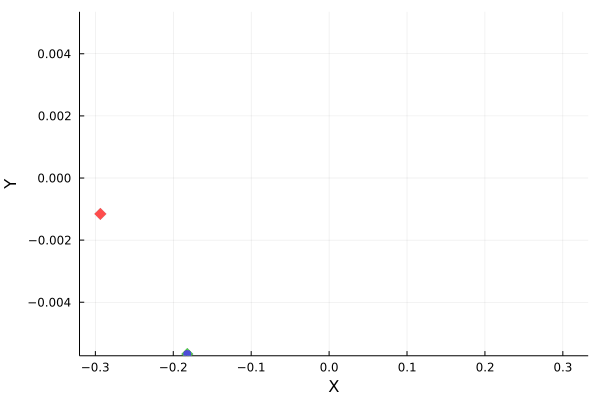

In [37]:
# 2D gif
gr()
plot()

anim = @animate for i in 1:length(X)
    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=6,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:lighttest)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)
    if i > 1
        scatter!([X[i-1]],[Y[i-1]],color=cgrad(:Blues)[0.1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=1)
    end
    xlims!(minimum(X)*1.01,maximum(X)*1.01) 
    ylims!(minimum(Y)*1.01,maximum(Y)*1.01)
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/uniq_plot/phate2_2d_fps2.gif", fps=2)

In [1]:
# 2D landscape gif
gr()
plot()

anim = @animate for i in 1:length(X)
    scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7.5,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7.5,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:grays)[2],
            markersize=5.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(minimum(X)*1.05,maximum(X)*1.05) 
    ylims!(minimum(Y)*1.05,maximum(Y)*1.05)
    plot!(xlabel="X", ylabel="Y")
    
end #every 100

gif(anim,"../plot/uniq_plot/phate2_gifland_fps2.gif", fps=2)

LoadError: UndefVarError: gr not defined